# Data 정보

* Survived: 0 = No, 1 = Yes
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* cabin: Cabin number
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
# 데이터 분석에 필요한 라이브러리들을 import
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rc

# os x(mac os) 한글 font 
rc('font', family='AppleGothic')

# 노트북 안에 그래플 그리기 위해 셋팅
%matplotlib inline

# 그래프를 격자 스타일로 (숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용.)
plt.style.use("ggplot")

# 그래프에서 마이너스 폰트 깨지는 문제 해결을 위해
mpl.rcParams["axes.unicode_minus"] = False

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# 직접 채워줘야 하는 데이터들
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
import missingno as msno

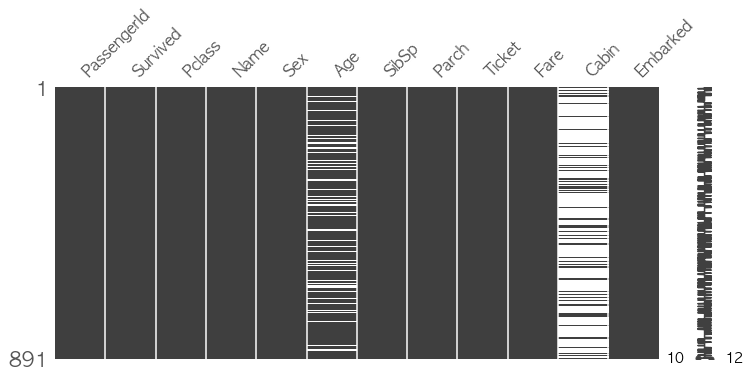

In [10]:
msno.matrix(train, figsize=(12,5))

In [41]:
# discrete 데이터들을 survive, dead 로 시각화.

def bar_chart(feature, ax=None):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, ax=ax)


[Text(0.5,1,'승선 장소')]

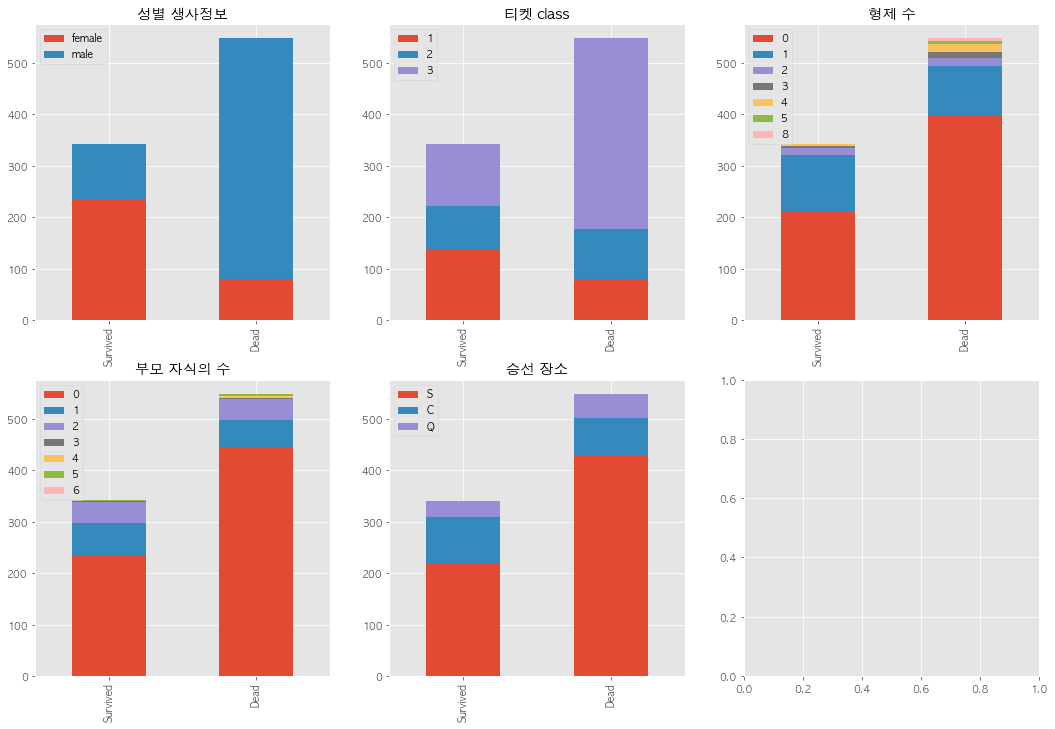

In [42]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,12)

bar_chart('Sex', ax1)
bar_chart('Pclass', ax2)
bar_chart('SibSp', ax3)
bar_chart('Parch', ax4)
bar_chart('Embarked', ax5)

ax1.set(title="성별 생사정보")
ax2.set(title="티켓 class")
ax3.set(title="형제 수")
ax4.set(title="부모 자식의 수")
ax5.set(title="승선 장소")

# 데이터 시각화를 통한 데이터 분석

### 1. 성별

-> 남자의 경우 죽을 확률이 확연하게 큼을 확인할 수 있다.

### 2. 티켓 class 별

-> 티켓 가격이 높을수록 살아남을 확률이 크다.

### 3,4. 형제 , 부모/자식

-> 형제, 부모/자식이 없는 경우 죽을 확률이 크다.

### 5. 승선장소
-> C 승선장 Cherbourg에서 탄 사람이 살아남은 수가 크다.

In [43]:
# continous 데이터 분석

def draw_facetgrid(feature):
    facet = sns.FacetGrid(train, hue="Survived", aspect=5)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, train[feature].max()))
    # survived 라벨을 표시.
    facet.add_legend() 
    plt.show()


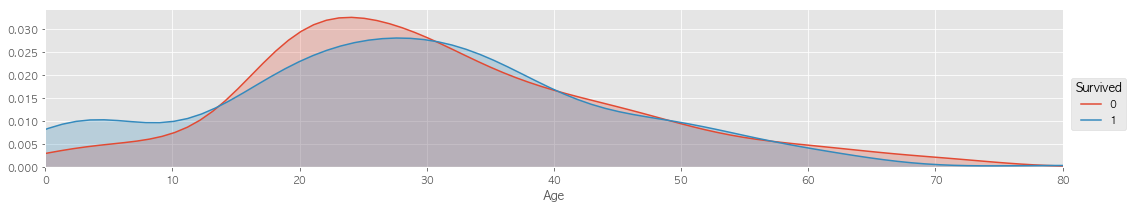

In [44]:
draw_facetgrid("Age")

### 10 이하의 경우 살 확률이 크고, 10대 중반에서 30 살까지는 죽을 확률이 더큼. 나머지 데이터는 큰 의미가 없음.

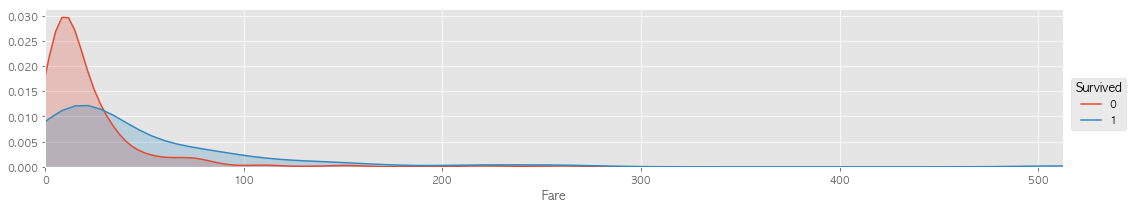

In [45]:
draw_facetgrid("Fare")

### 전에 pclass 데이터로 확인한 것처럼 비싸게 표를 산 사람들이 살 확률이 더 높음.

In [46]:
# name 분석

for data in [train]:
    data["Title"] = data["Name"].str.extract('([A-Za-z]+)\.', expand=False)

In [47]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Lady          1
Countess      1
Jonkheer      1
Mme           1
Sir           1
Ms            1
Capt          1
Don           1
Name: Title, dtype: int64

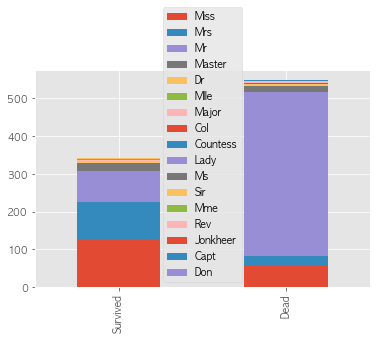

In [50]:
bar_chart("Title")


In [52]:
# Cabin 데이터 분석

train.Cabin.value_counts()

for dataset in [train]:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [53]:
train.Cabin.value_counts()


C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

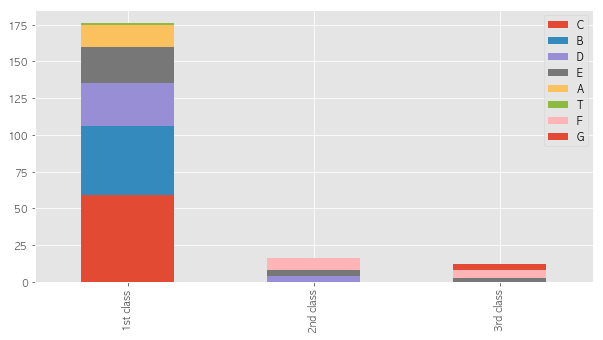

In [54]:
# Pclass 별로 cabin 확인해보기.
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))